In [1]:
import pandas as pd
import datetime
import os


# load normal data

In [2]:
dfs = [pd.read_parquet(f"./DNS-Tunnel-Datasets/normal/normal/{f}") for f in 
              os.listdir('./DNS-Tunnel-Datasets/normal/normal/') if f.endswith('.pq')]

cols_unwanted = ['payload.ack', 'payload.dataofs', 'payload.flags', 'payload.reserved', 'payload.seq', 'payload.urgptr', 'payload.window']
dfs = [df[[c for c in df.columns if c not in cols_unwanted]] for df in dfs]

df_normal = pd.concat(dfs)

# for f in [f for f in os.listdir('./DNS-Tunnel-Datasets/tunnel/') if f.endswith('.pq')]


/var/folders/vt/4l69jtfd3m5blk3vs5plrg_40000gp/T/ipykernel_66189/3858785897.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_normal = pd.concat(dfs)


In [3]:
# sanity check

df_normal['qname'].value_counts()

qname
img1.wsimg.com.                      764
www.google.com.                      726
performance.radar.cloudflare.com.    630
d38psrni17bvxu.cloudfront.net.       574
cdn.jsdelivr.net.                    536
                                    ... 
pro-technology.com.                    2
outplay-helios.com.                    2
pokerdomdream.ru.                      2
pokerdom-3947.top.                     2
plmlatina.net.                         2
Name: count, Length: 974410, dtype: int64

# load tunneling data

In [4]:
dfs = [pd.read_parquet(f"./DNS-Tunnel-Datasets/tunnel/{f}") for f in 
              os.listdir('./DNS-Tunnel-Datasets/tunnel/') if f.endswith('.pq')]

cols_unwanted = ['payload.ack', 'payload.dataofs', 'payload.flags', 'payload.reserved', 'payload.seq', 'payload.urgptr', 'payload.window']
dfs = [df[[c for c in df.columns if c not in cols_unwanted]] for df in dfs]

df_tunneling = pd.concat(dfs)

# for f in [f for f in os.listdir('./DNS-Tunnel-Datasets/tunnel/') if f.endswith('.pq')]


In [5]:
# quick sanity check
df_tunneling['qname']

0                               vaaaakaqoou.www.ggy666.tk.
1                               vaaaakaqoou.www.ggy666.tk.
2          lahxxmg4jl15duwvgubes0sidhbeq23q.www.ggy666.tk.
3          lahxxmg4jl15duwvgubes0sidhbeq23q.www.ggy666.tk.
4                                    yrbdtx.www.ggy666.tk.
                               ...                        
36692                                r13311.www.ggy666.tk.
36693                                r13310.www.ggy666.tk.
36694                                r13312.www.ggy666.tk.
36695    dIUIAAWBWWJAAAQAGDCFMBKBVAHAKQNICQ64AAFXGWPC76...
36696                                r13313.www.ggy666.tk.
Name: qname, Length: 375810, dtype: object

# join data, add label column

In [6]:
df_normal['label'] = 0
df_tunneling['label'] = 1

df_all = pd.concat([df_normal, df_tunneling])

/var/folders/vt/4l69jtfd3m5blk3vs5plrg_40000gp/T/ipykernel_66189/3966403242.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_normal, df_tunneling])


In [7]:
df_all['label'].value_counts()

label
0    2012494
1     375810
Name: count, dtype: int64

# start EDA

In [8]:
df_all.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,unicastresponse,qclass,tc,fl,plen,nh,hlim,payload.payload.ns,label,payload.payload.ar
0,4,5.0,0.0,63.0,31242.0,0.0,0.0,128.0,17.0,46867.0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,4,5.0,0.0,79.0,52057.0,2.0,0.0,64.0,17.0,26036.0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,4,5.0,0.0,55.0,31243.0,0.0,0.0,128.0,17.0,46874.0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,5.0,0.0,71.0,52079.0,2.0,0.0,64.0,17.0,26022.0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,4,5.0,0.0,63.0,31244.0,0.0,0.0,128.0,17.0,46865.0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [9]:
# see if any columns are null

for c in df_all.columns:
    if df_all[c].isnull().sum() / df_all.shape[0] > 0.99:
        print(c)

payload.payload.length
tc
fl
plen
nh
hlim
payload.payload.ns


## pandas inbuilt EDA

In [10]:
df_all.dtypes

version                      int64
ihl                        float64
tos                        float64
len                        float64
id                         float64
flags                      float64
frag                       float64
ttl                        float64
proto                      float64
chksum                     float64
src                         object
dst                         object
payload.sport                int64
payload.dport                int64
payload.len                float64
payload.chksum               int64
payload.payload.length     float64
payload.payload.id           int64
payload.payload.qr           int64
payload.payload.opcode       int64
payload.payload.aa           int64
payload.payload.tc           int64
payload.payload.rd           int64
payload.payload.ra           int64
payload.payload.z            int64
payload.payload.ad           int64
payload.payload.cd           int64
payload.payload.rcode        int64
payload.payload.qdco

In [11]:
df_all.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
version,2388304.0,4.000039,0.008872,4.0,4.0,4.0,4.0,6.0
ihl,2388257.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
tos,2388257.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
len,2388257.0,108.359698,143.414574,50.0,60.0,72.0,92.0,1499.0
id,2388257.0,31778.908373,19334.450959,0.0,14958.0,31634.0,48438.0,65535.0
flags,2388257.0,1.002148,0.999998,0.0,0.0,2.0,2.0,2.0
frag,2388257.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ttl,2388257.0,95.931322,31.999943,54.0,64.0,64.0,128.0,128.0
proto,2388257.0,16.999963,0.020132,6.0,17.0,17.0,17.0,17.0
chksum,2388257.0,32553.536771,18609.611895,0.0,16518.0,32725.0,48109.0,65535.0


In [12]:
set([type(v) for v in df_all['payload.payload.ar']])

{NoneType, float, numpy.ndarray}

In [13]:
set([type(v) for v in df_all['payload.payload.ns']])

{NoneType, float, numpy.ndarray}

In [14]:
happy_path_columns_to_drop = ['payload.payload.ns', 'payload.payload.ar']
happy_path_columns_to_stringize = ['qname', 'src', 'dst']


# note the copy here!  
df_all_happy_path = df_all[[c for c in df_all.columns if c not in happy_path_columns_to_drop]].copy()

for c in happy_path_columns_to_stringize:
    df_all_happy_path[c] = df_all_happy_path[c].astype('string')


## dabl

/Users/amarks-b/INCD/ML_course/day_1_dns/venv_day1/lib/python3.10/site-packages/dabl/preprocessing.py:475: UserWarning: Index not unique, resetting index!
  warn("Index not unique, resetting index!", UserWarning)
/Users/amarks-b/INCD/ML_course/day_1_dns/venv_day1/lib/python3.10/site-packages/dabl/preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/Users/amarks-b/INCD/ML_course/day_1_dns/venv_day1/lib/python3.10/site-packages/dabl/preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/Users/amarks-b/INCD/ML_course/day_1_dns/venv_day1/lib/python3.10/site-packages/dabl/preprocessing.py:177: UserWarning: Could not infer format, s

Target looks like classification


/Users/amarks-b/INCD/ML_course/day_1_dns/venv_day1/lib/python3.10/site-packages/dabl/plot/utils.py:712: UserWarning: Dropped 9222 outliers in column payload.payload.ancount.
  warn("Dropped {} outliers in column {}.".format(
/Users/amarks-b/INCD/ML_course/day_1_dns/venv_day1/lib/python3.10/site-packages/dabl/plot/utils.py:615: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:
/Users/amarks-b/INCD/ML_course/day_1_dns/venv_day1/lib/python3.10/site-packages/dabl/plot/utils.py:622: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(target)[column].valu

Linear Discriminant Analysis training set score: 0.805


/Users/amarks-b/INCD/ML_course/day_1_dns/venv_day1/lib/python3.10/site-packages/dabl/plot/utils.py:615: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='label'>,
 [<Figure size 2000x400 with 10 Axes>,
  array([[<Axes: title={'center': '0.971'}, xlabel='payload.len', ylabel='payload.payload.a...(jittered)'>,
          <Axes: title={'center': '0.969'}, xlabel='len', ylabel='payload.payload.a...(jittered)'>,
          <Axes: title={'center': '0.951'}, xlabel='len', ylabel='payload.dport'>,
          <Axes: title={'center': '0.951'}, xlabel='len', ylabel='payload.sport'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 array([[<Axes: title={'center': 'qtype'}>,
         <Axes: title={'center': 'dst'}>, <Axes: title={'center': 'src'}>,
         <Axes: title={'center': 'payload.payload.ra'}>],
        [<Axes: title={'center': 'payload.payload.rd'}>,
         <Axes: title={'center': 'flags'}>,
         <Axes: title={'center': 'payload.payload.qr'}>, <Axes: >]],
       dtype=object)]

/Users/amarks-b/INCD/ML_course/day_1_dns/venv_day1/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


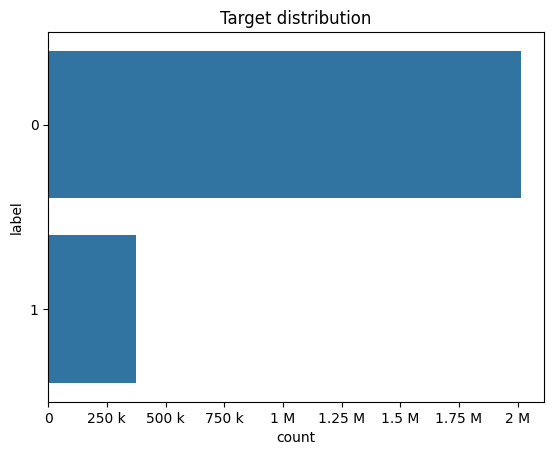

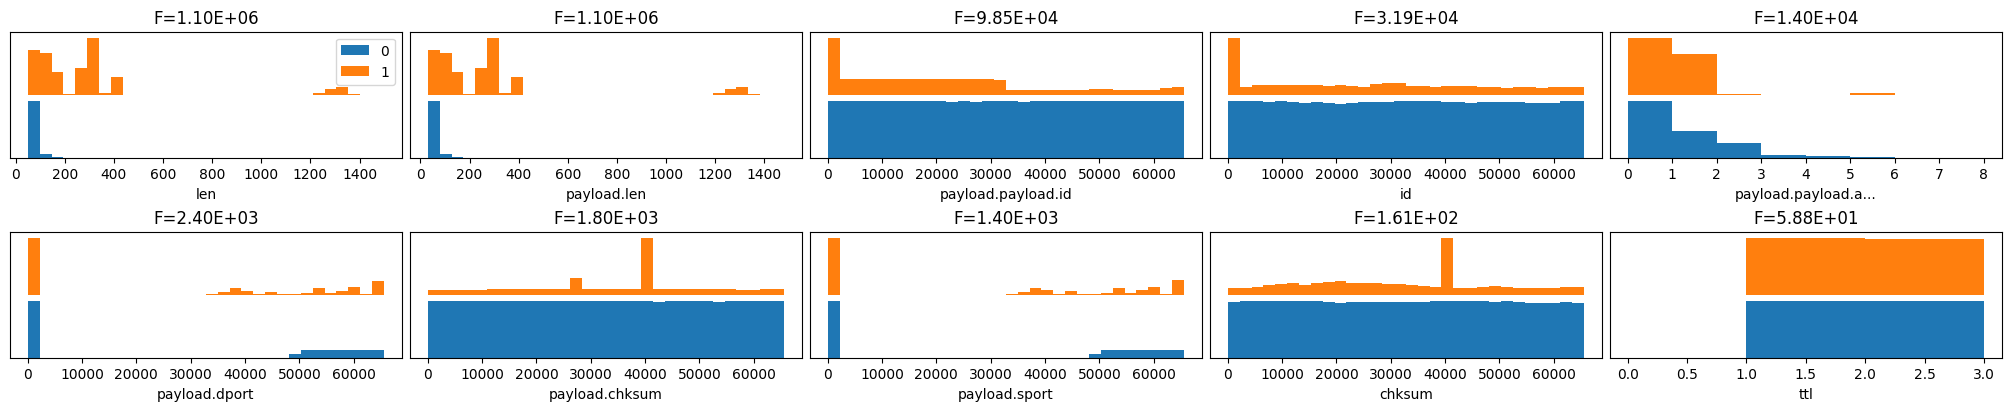

/Users/amarks-b/INCD/ML_course/day_1_dns/venv_day1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


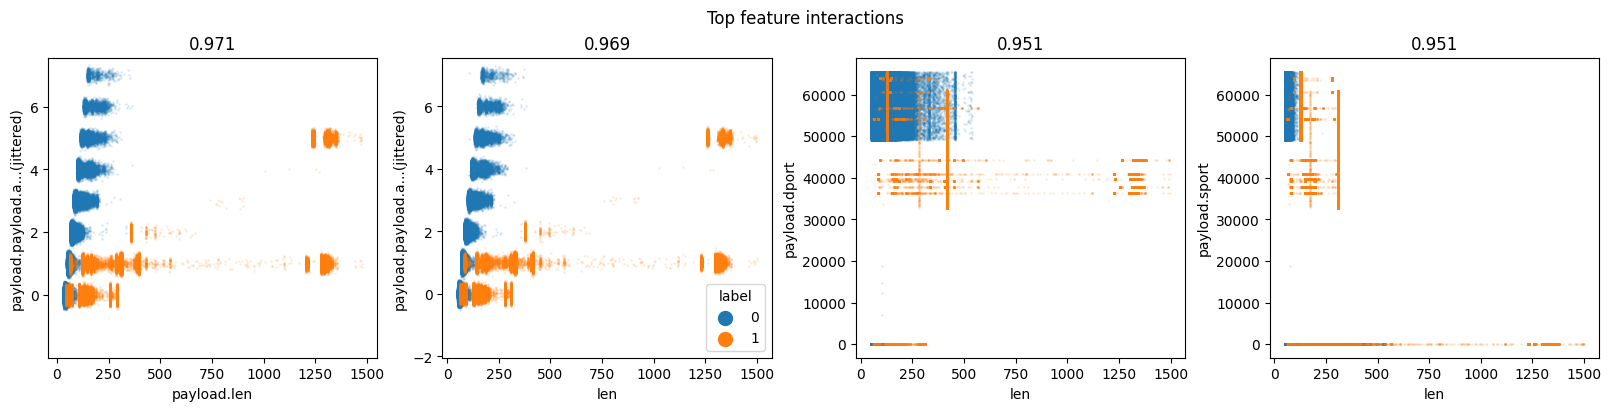

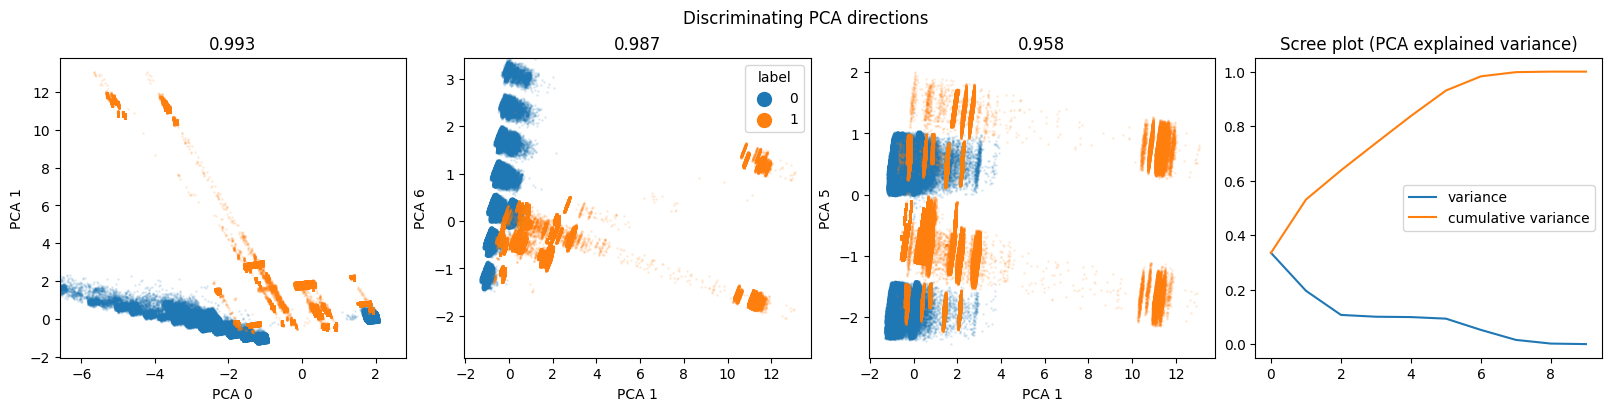

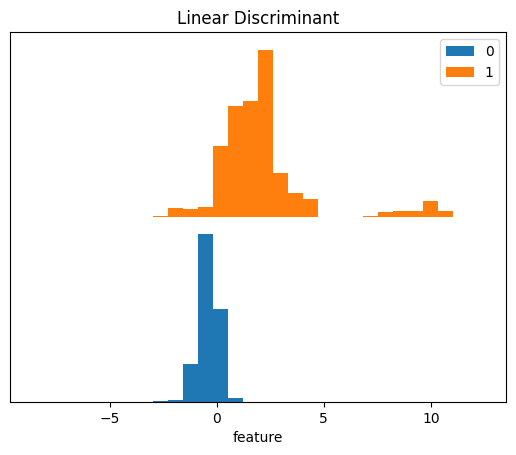

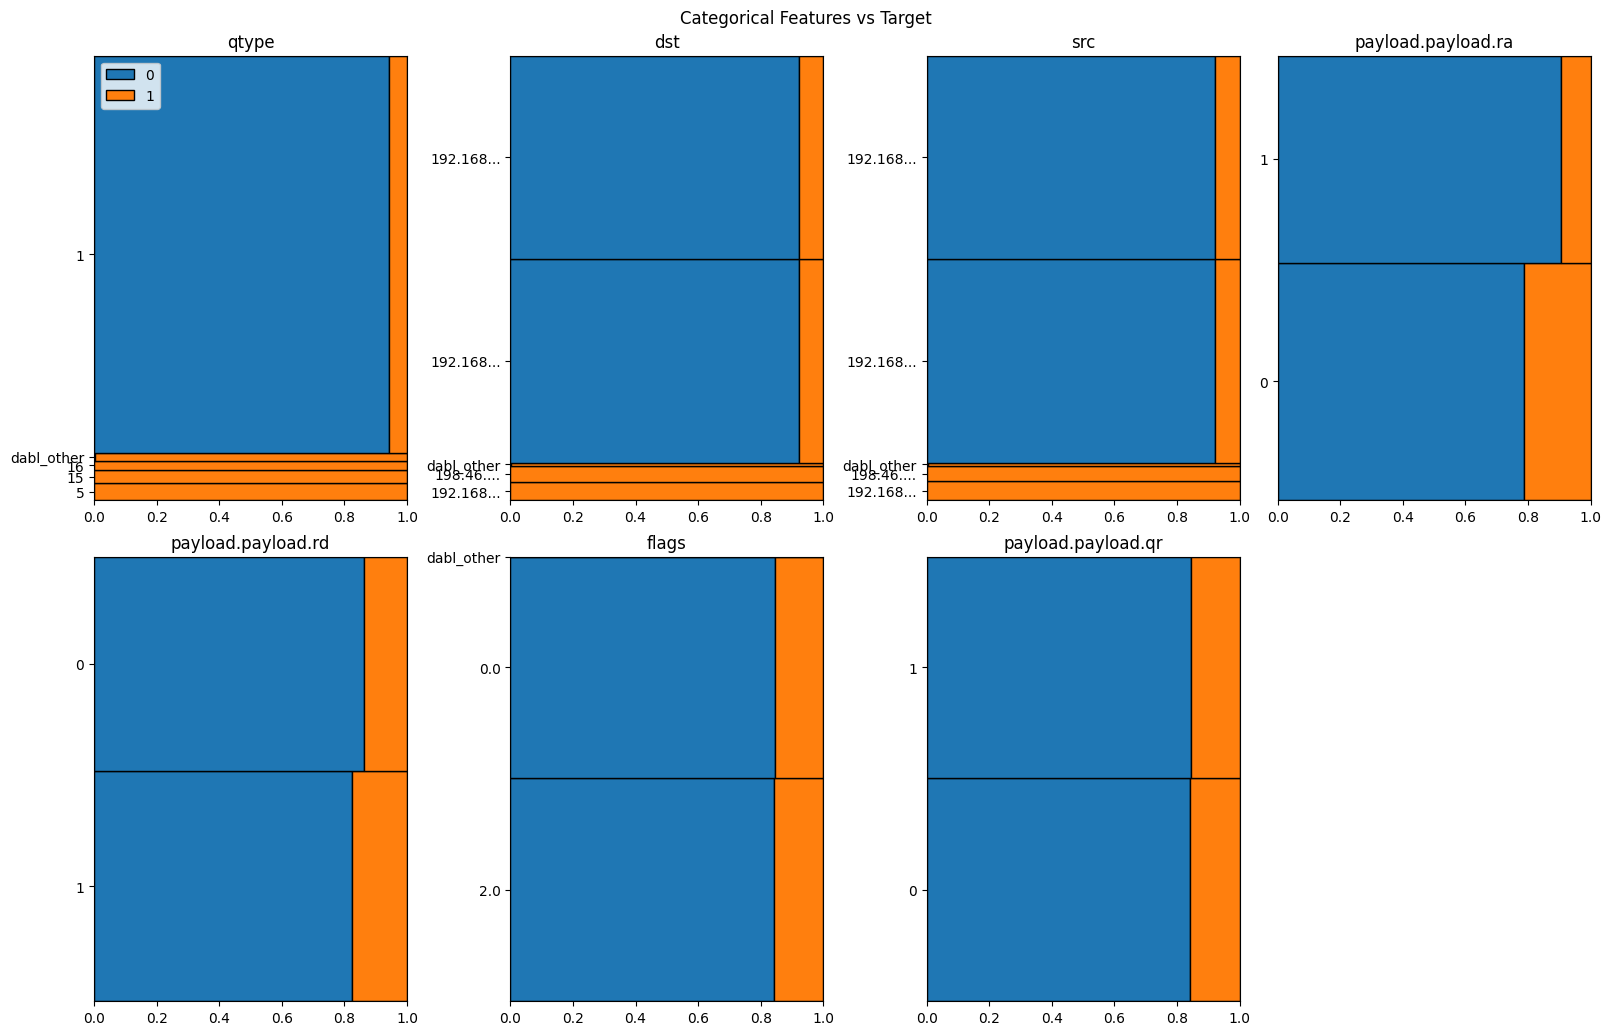

In [20]:
import dabl

dabl.plot(df_all_happy_path, target_col="label")


## sweetviz EDA report

In [16]:
# import sweetviz as sv
# import warnings
# import numpy as np

# # just fixes an annoying depreciation warning np issue
# warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# # Analyze the DataFrame
# # "target_feat" is the label column

# report = sv.analyze(df_all_happy_path, target_feat='label')

# # Show the report in the Jupyter Notebook
# report.show_notebook()


## klib

## klib

GridSpec(6, 6)

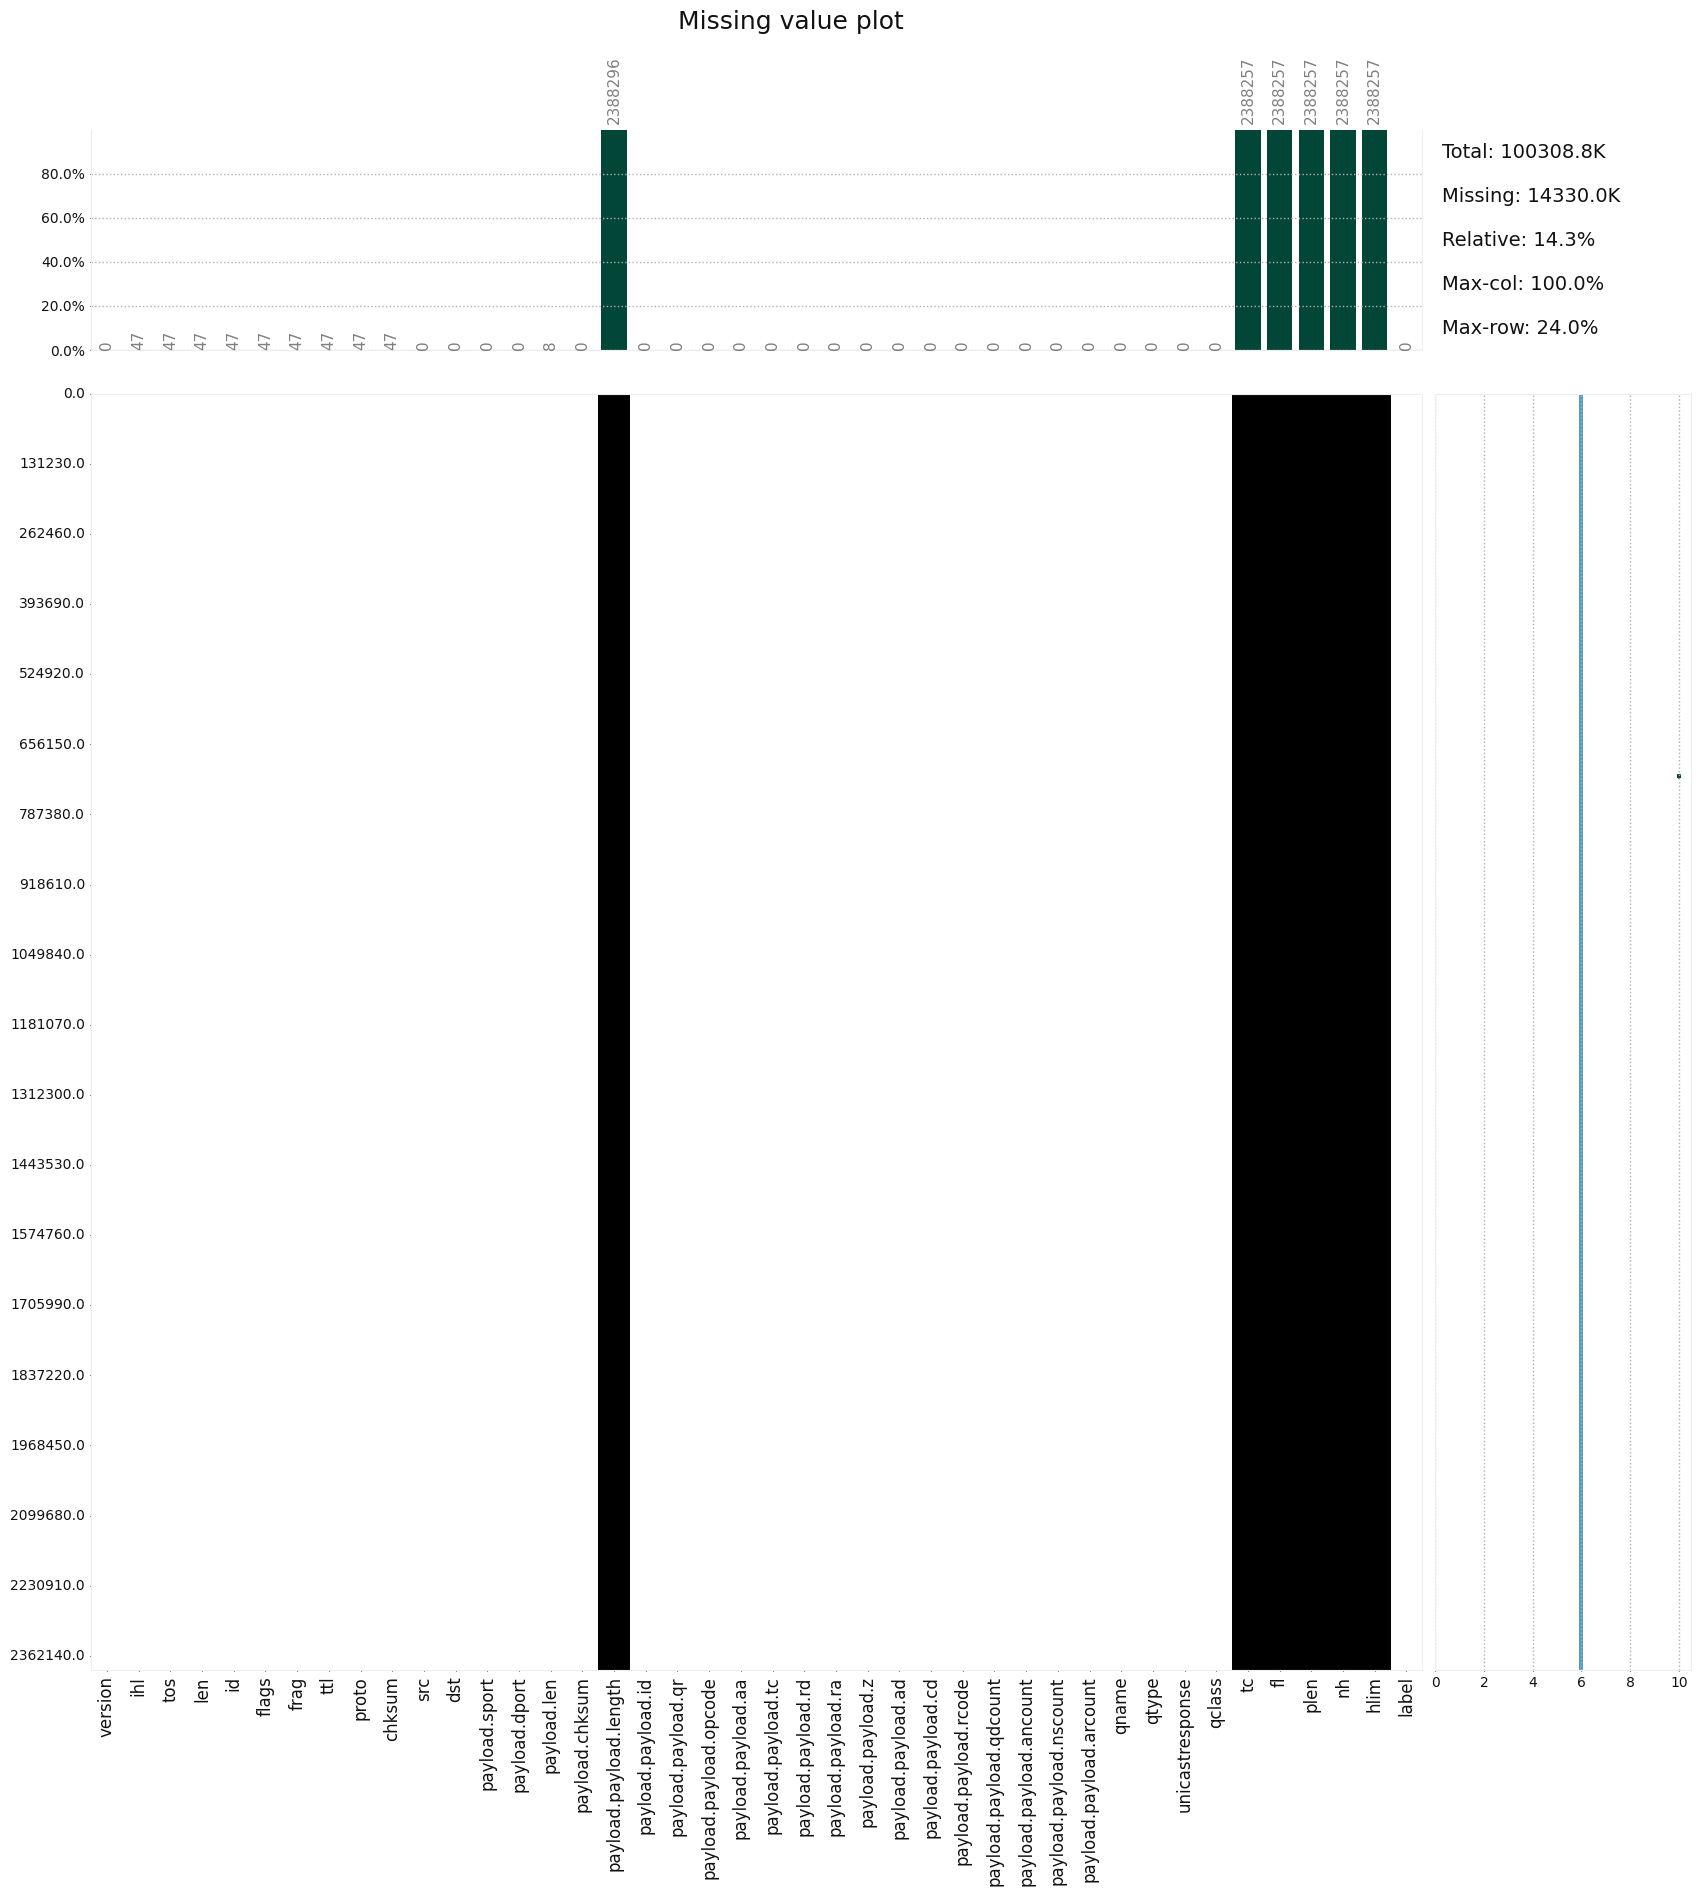

In [21]:
import klib
klib.missingval_plot(df_all_happy_path)


Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

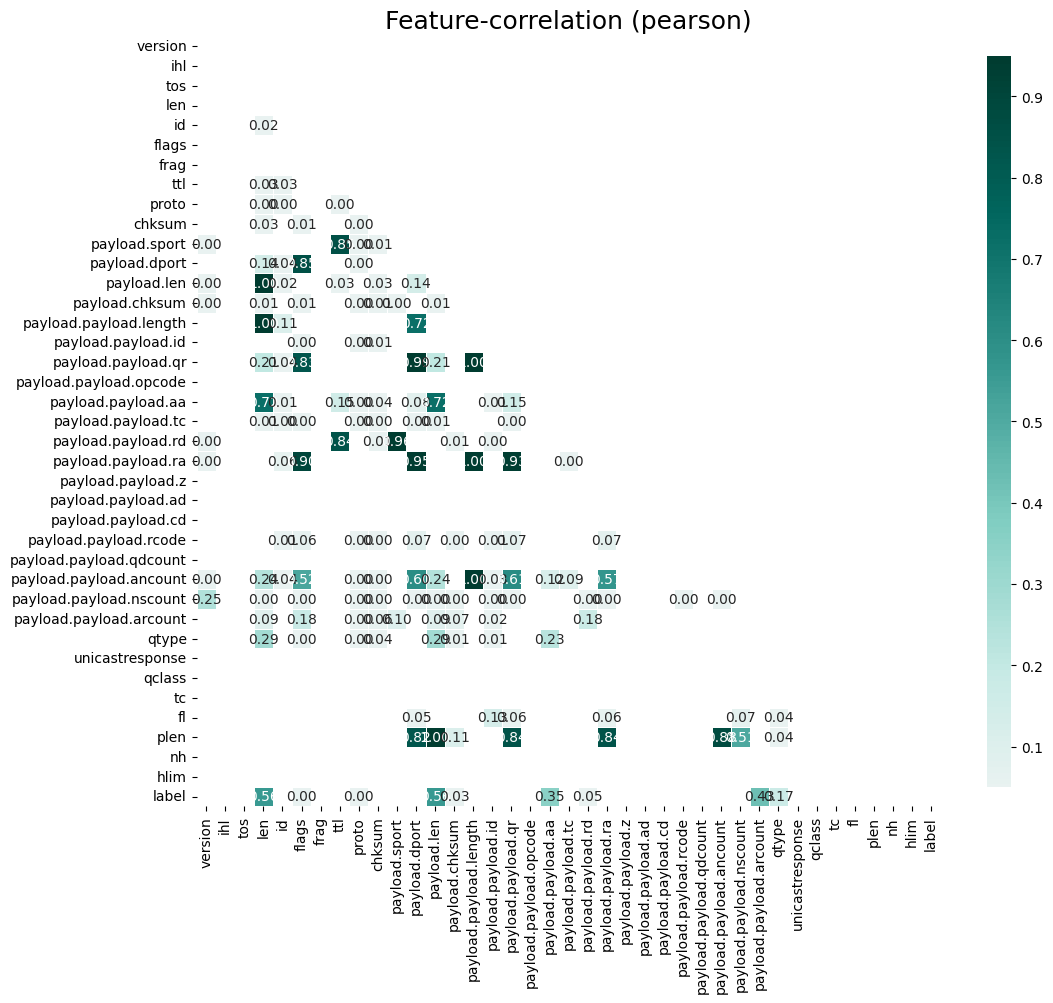

In [22]:
klib.corr_plot(df_all_happy_path, split='pos')


## pywalker tool

In [ ]:
import pygwalker as pyg

walker = pyg.walk(df_all)

In [25]:
df_all[['src', 'dst']]

,src,dst
0,192.168.68.62,192.168.68.1
1,192.168.68.1,192.168.68.62
2,192.168.68.62,192.168.68.1
3,192.168.68.1,192.168.68.62
4,192.168.68.62,192.168.68.1
...,...,...
36692,192.168.117.2,192.168.117.128
36693,192.168.117.2,192.168.117.128
36694,192.168.117.128,192.168.117.2
36695,192.168.117.128,192.168.117.2


# FE experimentation

In [26]:
df_all['qname'].apply(lambda x:x.split('.')[-2])

0        xyz
1        xyz
2         de
3         de
4        com
        ... 
36692     tk
36693     tk
36694     tk
36695     tk
36696     tk
Name: qname, Length: 2388304, dtype: object

In [27]:
df_all['qname'].apply(lambda x:x.split('.')[0])

0                                            freshcasino32
1                                            freshcasino32
2                                                   fibtex
3                                                   fibtex
4                                            girlswallowed
                               ...                        
36692                                               r13311
36693                                               r13310
36694                                               r13312
36695    dIUIAAWBWWJAAAQAGDCFMBKBVAHAKQNICQ64AAFXGWPC76...
36696                                               r13313
Name: qname, Length: 2388304, dtype: object